# Classificastion Task - predict Covid19 

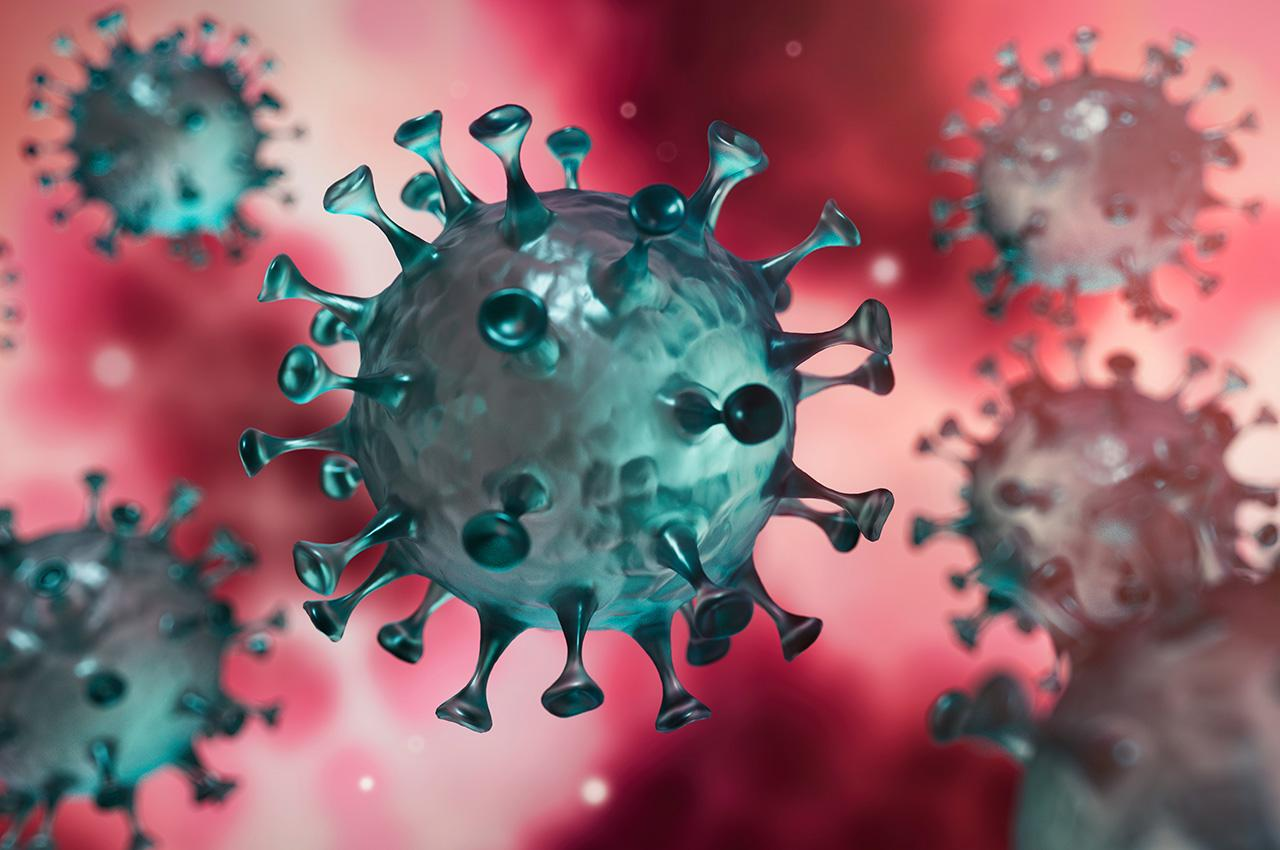

## General information about Covid19

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2. The first known case was identified in Wuhan, China, in December 2019.The disease has since spread worldwide, leading to an ongoing pandemic.

Symptoms of COVID‑19 are variable, but often include **fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste**. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).] Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

# Our classification prediction:if the person is positive with corona


# Importing necessary libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
import plotly.express as px


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## Part #1 : Basic info on the Data

In [187]:
df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")

In [188]:
#df = pd.read_csv("C:\\Project\\corona_tested_individuals_ver_00225.csv")


### This dataset contains information about Covid19 taken from https://data.gov.il/dataset/covid-19.

The columns in the given dataset is as follows:

- **test_date:** the date the test were taken
- **cough:**if the person is coughing or not
- **fever:**if the person is having fever or not
- **sore_thorat:**if the person is having sore thoat or not
- **shortness_of_breath:**if the person having shortness of breathing or not
- **head_ache:** if the person is having head ache or not
- **corona_result:** the result of the corona test, postive or negative
- **age_60_and_above:** if the person is abobe 60 or not
- **gender:** whats is the gender, male or female
- **test_indication:** where the test had been taking

In [189]:
df.sample (7)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
1480950,2021-10-15,0,0,0,0,0,שלילי,NaN,זכר,Other
211551,2022-01-30,0,0,0,0,0,שלילי,Yes,נקבה,Other
2359861,2021-08-19,0,0,0,0,0,שלילי,Yes,זכר,Other
5541741,2020-12-19,0,0,0,0,0,שלילי,Yes,זכר,Other
8111926,2020-07-13,1,0,0,0,0,שלילי,No,נקבה,Contact with confirmed
8087490,2020-07-14,0,0,0,0,0,שלילי,No,נקבה,Other
3706795,2021-03-23,0,0,0,0,0,שלילי,NaN,NaN,Other


- Just by looking at the data, we can see with have too much. <br>We will need to get rid of some of the data, we will do it later.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


- We will now change all the string data to int data in order to have the same type:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1
<br> And we will get rid of the "other" in corona result so it won't affect the data.

In [191]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [192]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


In [193]:
# checking all the data share the same type:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858382 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 743.4+ MB


- We want want to predict the corona result column, so we first take a look at all the data about it

In [194]:
# Postive with corona:
df[df['corona_result']==1].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,908643.0,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,1.0,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.0,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [195]:
# negative with corona:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7949739.0,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,0.0,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,0.0,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00


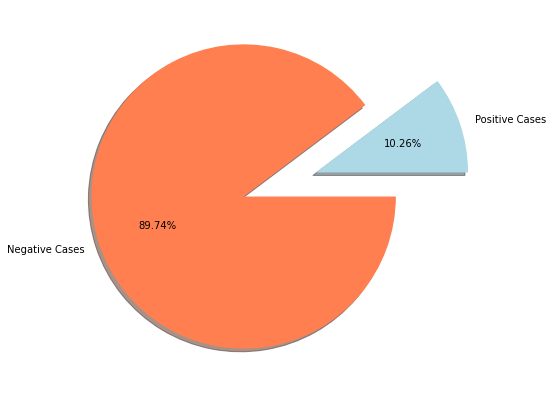

In [196]:
df_negative = df['corona_result'] == 0
df_positive = df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [df_positive.sum(), df_negative.sum()]
colors = ['lightblue', 'coral']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=0)


plt.show()

### important information from the tables above:
- The majority of the cases are the negative results.

### Now we will clean all the NaN Data

In [197]:
df.isnull().sum()
df = df.dropna()

### Checking the size after cleaning all the NaN data

In [198]:
df.shape

(6207383, 10)

### After we cleaned around 3 milions rows of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [199]:
sample_df= df.sample(int(len(df) * 0.002))

## info about the sample data

### size of the sample data

In [200]:
sample_df.shape

(12414, 10)

In [201]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
5718932,2020-12-13,0,0,0,0,0,0,0.0,0.0,Other
5526506,2020-12-20,0,1,1,0,0,1,0.0,1.0,Other
4662119,2021-01-19,0,0,0,0,0,0,0.0,0.0,Other
6311194,2020-11-12,0,0,0,0,0,0,0.0,1.0,Other
4676645,2021-01-18,1,0,0,0,0,0,1.0,0.0,Other


Corona result that equals to "other" is still irrelevant so we will drop it

In [202]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)

### Changing all the types to int

In [203]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [204]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 5718932 to 731974
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [205]:
sample_df['gender'].value_counts()

0.0    6342
1.0    6072
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

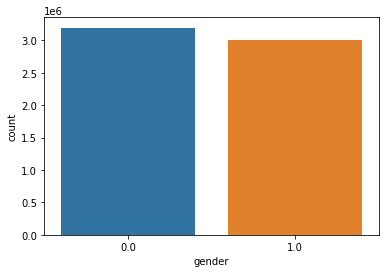

In [206]:
sns.countplot(df['gender'])


In [207]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [208]:
Distribution_sample={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache', 'corona_result','age_60_and_above'],
                     'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,633
1,fever,476
2,sore_throat,250
3,shortness_of_breath,46
4,head_ache,492
5,corona_result,1609
6,age_60_and_above,1626


In [209]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [107]:
Distribution_orginal={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above'],
                      'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


## Now we will check the distribtuion of the parameters stays the same like the original data frame

Text(0.5, 1.0, 'Distribution_sample')

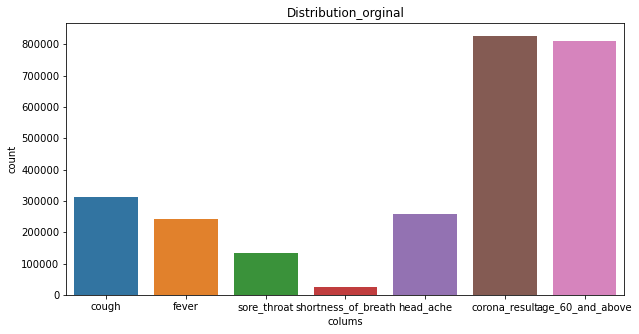

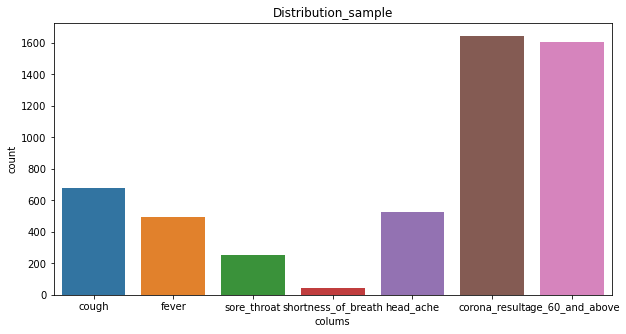

In [108]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

### From the table above we can infer that the ration stays the same

In [109]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,1644.00000,1644.000000,1644.000000,1644.000000,1644.000000,1644.0,1644.000000,1644.000000
mean,0.16180,0.121046,0.056569,0.011557,0.122871,1.0,0.130779,0.487226
std,0.36838,0.326280,0.231088,0.106914,0.328389,0.0,0.337261,0.499989
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


## We can now see the percentage between postive and negative case stays roughly the same

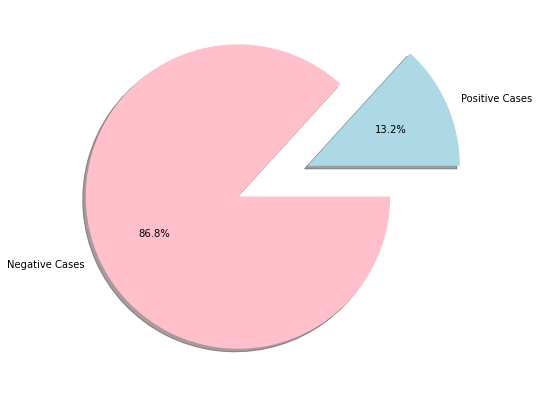

In [110]:
sample_df_negative = sample_df['corona_result'] == 0
sample_df_positive = sample_df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

## Showing the connection between sympytonms and corona reslut

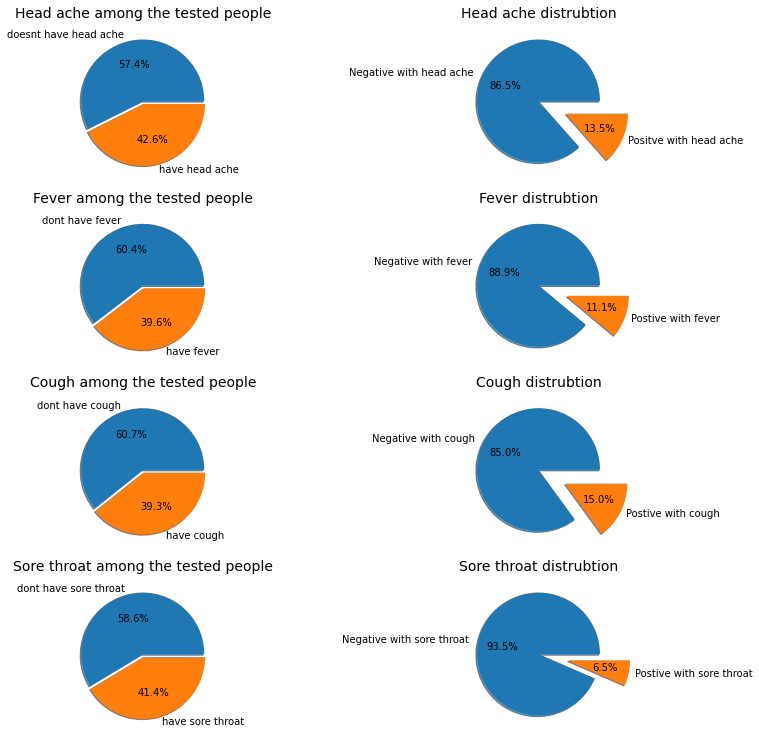

In [30]:
fig, ax = plt.subplots(4,2 ,figsize = (13,13))
((ax1, ax2) , (ax3, ax4),(ax5, ax6) , (ax7, ax8)) = ax
labels = ["doesnt have head ache ", "have head ache"]
values = sample_df[(sample_df['head_ache']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax1.set_title("Head ache among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with head ache ", "Positve with head ache"]
values = sample_df[(sample_df['corona_result']==1)]['head_ache'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax2.set_title("Head ache distrubtion", fontdict={'fontsize': 14})

labels = ["dont have fever", "have fever"]
values = sample_df[(sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax3.set_title("Fever among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with fever ", "Postive with fever"]
values = sample_df[(sample_df['corona_result']==1)]['fever'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax4.set_title("Fever distrubtion", fontdict={'fontsize': 14})

labels = ["dont have cough", "have cough"]
values = sample_df[(sample_df['cough']==1)]['corona_result'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax5.set_title("Cough among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with cough ", "Postive with cough"]
values = sample_df[(sample_df['corona_result']==1)]['cough'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax6.set_title("Cough distrubtion", fontdict={'fontsize': 14})

labels = ["dont have sore throat", "have sore throat"]
values = sample_df[(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax7.set_title("Sore throat among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with sore throat ", "Postive with sore throat"]
values = sample_df[(sample_df['corona_result']==1)]['sore_throat'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax8.set_title("Sore throat distrubtion", fontdict={'fontsize': 14})


plt.show()

# Checking for correlations in our dataset

We want to see more cleary if there is a correlation between all the parameters

In [31]:
sample_df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.307411,0.306662,0.192911,0.351774,0.173072,0.059367,-0.029826
fever,0.307411,1.000000,0.185213,0.130254,0.304441,0.148853,0.006929,0.001952
sore_throat,0.306662,0.185213,1.000000,0.133057,0.331092,0.118500,0.015837,-0.029639
shortness_of_breath,0.192911,0.130254,0.133057,1.000000,0.179877,0.078724,0.019467,-0.018039
head_ache,0.351774,0.304441,0.331092,0.179877,1.000000,0.177623,-0.005587,-0.032434
corona_result,0.173072,0.148853,0.118500,0.078724,0.177623,1.000000,-0.000904,0.001041
age_60_and_above,0.059367,0.006929,0.015837,0.019467,-0.005587,-0.000904,1.000000,-0.023798
gender,-0.029826,0.001952,-0.029639,-0.018039,-0.032434,0.001041,-0.023798,1.000000


<AxesSubplot:>

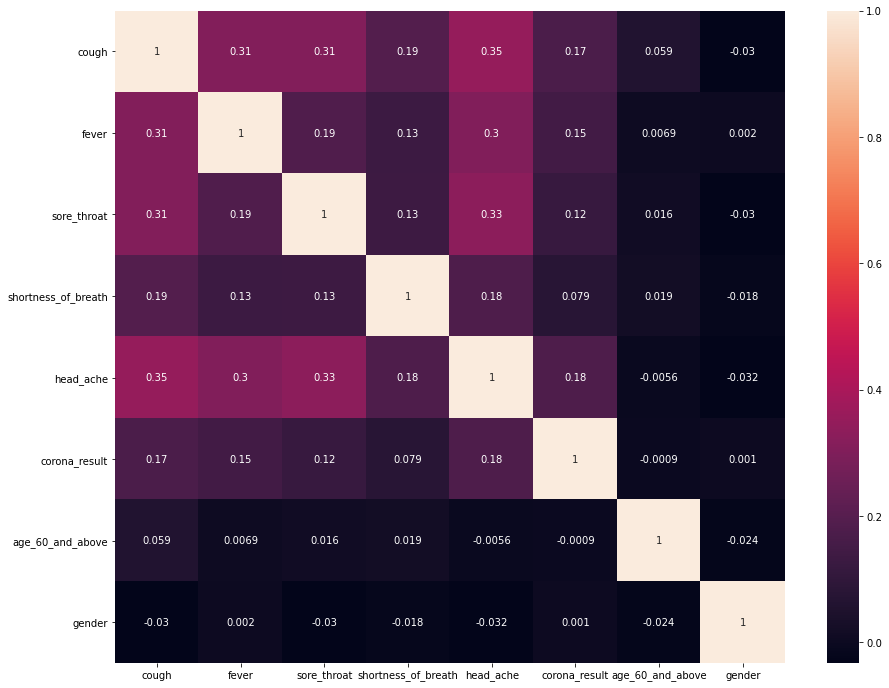

In [32]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)

### Conclusion
Using the hot map we noticed that there is no correlation between the following parameters:
- Gender
- Over the age of 60
- Indication for testing
- test date

So we decided to delete them.

In [210]:
sample_df.drop(['test_indication'], axis=1, inplace=True)

## Among the variables that have a correlation we will put them in a pie chart

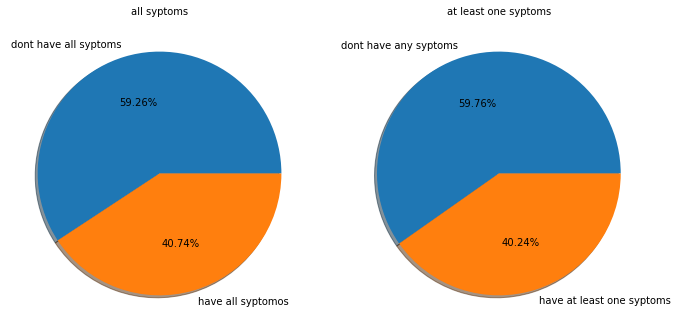

In [34]:
fig, ax = plt.subplots(1,2,figsize = (10,10))
((ax1, ax2)) = ax
labels = ["dont have all syptoms", "have all syptomos"]
values = sample_df[(sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("all syptoms", fontdict={'fontsize': 10})

labels = ["dont have any syptoms", "have at least one syptoms"]
values = sample_df[(sample_df['fever']==1) | (sample_df['cough']==1) | (sample_df['head_ache']==1) | (sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("at least one syptoms", fontdict={'fontsize': 10})
plt.tight_layout()


plt.show()

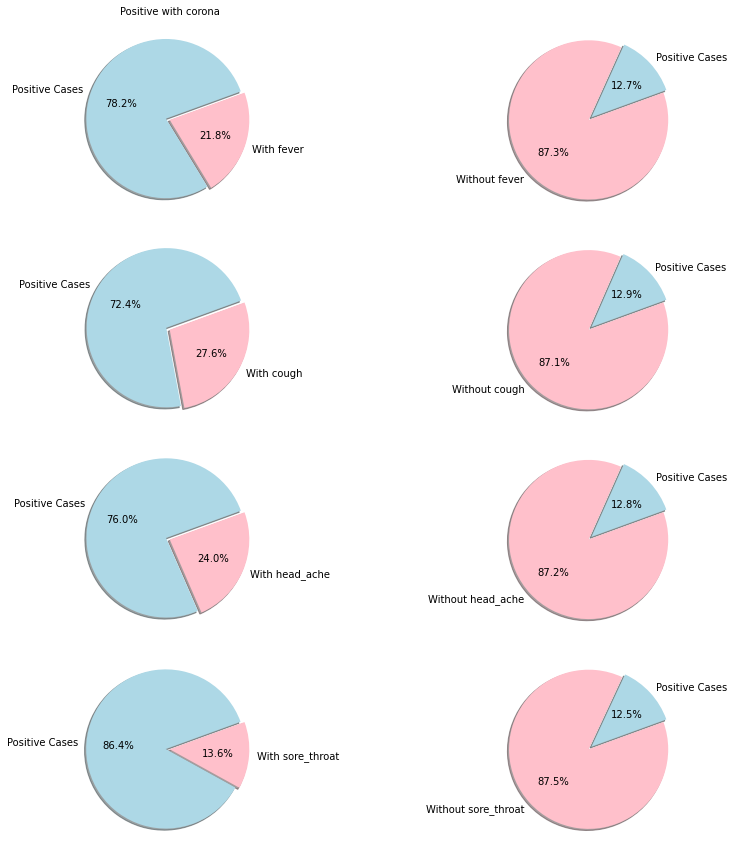

In [35]:
fig, ax = plt.subplots(4,2 ,figsize = (12,12))
((ax1, ax5) , (ax2, ax6),(ax3, ax7) , (ax4, ax8)) = ax

sample_df_fever = sample_df['fever'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)
ax1.set_title("Positive with corona", fontdict={'fontsize': 10})

sample_df_cough = sample_df['cough'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax3.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_fever = sample_df['fever'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax5.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax6.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax7.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax8.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

plt.tight_layout()
plt.show()


In [211]:
sample_df['at1_symptoms'] = np.where((sample_df['fever']==1) | (sample_df['cough']==1)|(sample_df['head_ache']==1)|(sample_df['sore_throat']==1), 1, 0)

In [212]:
sample_df['all_symptoms'] = np.where((sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1), 1, 0)

In [213]:
sample_df['all_symptoms'] = np.where((sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1), 1, 0)

## We take the parameters that are the most correlated

<AxesSubplot:>

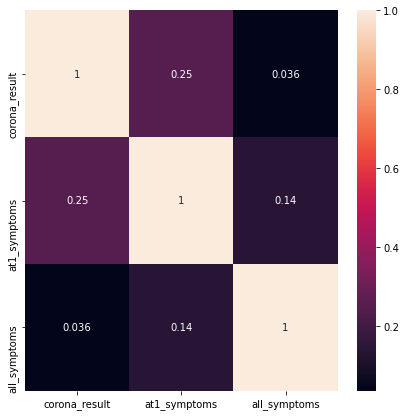

In [39]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(sample_df[['corona_result','at1_symptoms','all_symptoms']].corr(),annot=True)

#  Splitting our train set into x test y test

In [40]:
X = sample_df.drop(columns=['corona_result'])
Y = sample_df['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 7)

In [41]:
print(X_test.shape)
print(X_train.shape)

(1863, 10)
(10551, 10)


### We figured out that the data is imbalanced so we decied to add Synthetic data to help the model

In [42]:
from sklearn.utils import resample
df_1 = sample_df[sample_df.corona_result==1]
df_2 = sample_df[sample_df.corona_result==0] 
df_1_upsampled = resample(df_1, replace=True,n_samples=10718,random_state=1) 
df_upsampled = pd.concat([df_1_upsampled, df_2])
df_upsampled.corona_result.value_counts()

1    10718
0    10678
Name: corona_result, dtype: int64

In [43]:
df_upsampled = df_upsampled.drop(columns=['test_date'])
X = df_upsampled.drop(columns=['corona_result'])
Y = df_upsampled['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 1111)

In [44]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.500934754159656

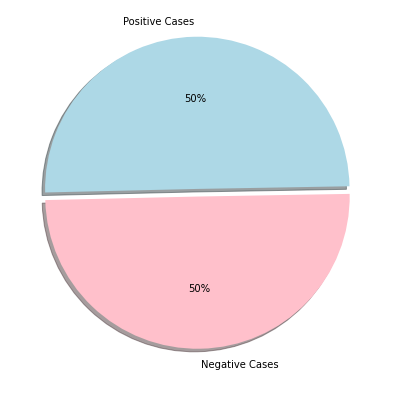

In [45]:
sample_df_negative = df_upsampled['corona_result'] == 0
sample_df_positive = df_upsampled['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.f%%', shadow=True, startangle=1)


plt.show()

# Evaluating each model's accuracy rate:

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_copy = pd.DataFrame(scaler.transform(X_train),  columns = X_train.columns)
X_test_copy = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Model #1 : KNN - K-Nearest Neighbors

In [53]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.5266355140186916


Text(0, 0.5, 'Testing Accuracy')

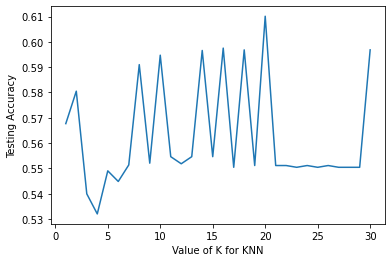

In [47]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    scores.append(metrics.accuracy_score(prediction, y_test))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Tunining Hyper-parameters 
in order to improve the model accuracy we try to figure the best hyper parameter of the algoritam 

In [411]:
from sklearn.model_selection import cross_val_score
for k in range(1,31,2):
    knn_k = KNeighborsClassifier(n_neighbors = k)
    ValScore = cross_val_score(knn_k, X_train, y_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.544478090342971
Cross-validation score for k = 3 is: 0.5518176930815254
Cross-validation score for k = 5 is: 0.5568264292492598
Cross-validation score for k = 7 is: 0.5564762358588802
Cross-validation score for k = 9 is: 0.5625364685789845
Cross-validation score for k = 11 is: 0.5572947000582412
Cross-validation score for k = 13 is: 0.5479108544338598
Cross-validation score for k = 15 is: 0.5776913777350585
Cross-validation score for k = 17 is: 0.5874789402017125
Cross-validation score for k = 19 is: 0.5668473974094242
Cross-validation score for k = 21 is: 0.5645759259183837
Cross-validation score for k = 23 is: 0.5484943177575676
Cross-validation score for k = 25 is: 0.5328246059900107
Cross-validation score for k = 27 is: 0.5336393028443116
Cross-validation score for k = 29 is: 0.5457605489055692


In [48]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
knn_accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.5441621999533908


In [56]:
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)

In [57]:
print("the scores of cross validation:")
print(accuracies.mean()*100)

the scores of cross validation:
56.68414918414918


## Confusion Matrix - KNN

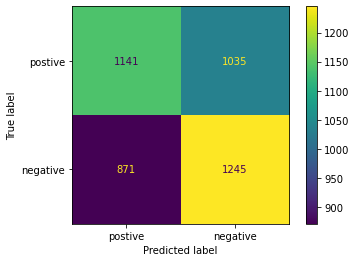

In [415]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

In [416]:
knn_prec = precision_score(prediction,y_test)
print('precision:',knn_prec)
knn_recall = recall_score(prediction,y_test)
print('recall:',knn_recall)
knn_f1 = f1_score(prediction,y_test)
print('f1:',knn_f1)
knn_acc = accuracy_score(prediction,y_test)
print("f2:",metrics.fbeta_score(prediction, y_test, beta=3))
print('accuracy:',knn_acc)

precision: 0.5883742911153119
recall: 0.5460526315789473
f1: 0.5664240218380346
f2: 0.5500088354833009
accuracy: 0.5559179869524697


# Model #2 : LogisticRegression

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg = metrics.accuracy_score(y_pred,y_test)
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)

Accuracy: 0.6058411214953271


In [65]:
accuracies_2 = cross_val_score(estimator = LogisticRegression(), X = X_train, y = y_train, cv = 10)

In [66]:
print(accuracies.mean()*100)

56.68414918414918


## Confusion Matrix - LogisticRegression

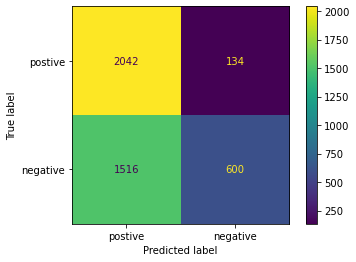

In [420]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

# Model #3 : DesicionTree


In [54]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)
dTree_predict = cross_val_predict(dTree, X_train, y_train, cv = 5)
dTree_accuracy = metrics.accuracy_score(y_pred,y_test)

In [68]:
dTree_prec = precision_score(y_train , dTree_predict)
dTree_recall = recall_score(y_train , dTree_predict)
dTree_f1 = f1_score(y_train , dTree_predict)
dTree_acc = accuracy_score(y_train , dTree_predict)
print('precision:',dTree_prec)
print('recall:',dTree_recall)
print('f1:',dTree_f1)
print('accuracy:',dTree_acc)

precision: 0.81646234676007
recall: 0.2705431754874652
f1: 0.40641617993200246
accuracy: 0.6032051282051282


In [69]:
accuracies = cross_val_score(estimator = dTree, X = X_train, y = y_train, cv = 10)

In [70]:
print(accuracies.mean()*100)

60.32634032634032


# Model #4 : RandomForest

In [55]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
random_forest_accuracy = metrics.accuracy_score(y_pred,y_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.6063084112149533


In [73]:
randomForest_predict = cross_val_predict(randomForest, X_train, y_train, cv = 5)
randomForest_prec = precision_score(y_train , randomForest_predict)
randomForest_recall = recall_score(y_train , randomForest_predict)
randomForest_f1 = f1_score(y_train , randomForest_predict)
randomForest_acc = accuracy_score(y_train , randomForest_predict)
print('precision:',randomForest_prec)
print('recall:',randomForest_recall)
print('f1:',randomForest_f1)
print('accuracy:',randomForest_acc)

precision: 0.8154865713289152
recall: 0.271355617455896
f1: 0.4072106592353914
accuracy: 0.6033216783216783


In [74]:
accuracies = cross_val_score(estimator = randomForest, X = X_train, y = y_train, cv = 10)

In [75]:
print(accuracies.mean()*100)

60.30885780885781


### Comparing our model to a dummy model


In [76]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_accuracy=dummy_clf.score(X, Y)

In [80]:
dummy_accuracy

0.5003496340496947

In [77]:
print("KNN-Accuracy:",metrics.accuracy_score(prediction,y_test))
print("LogisticRegression-Accuracy:",metrics.accuracy_score(y_pred,y_test))
print('accuracy:',randomForest_acc)
print('Dtree-accuracy:',dTree_acc)

KNN-Accuracy: 0.5441621999533908
LogisticRegression-Accuracy: 0.6101141924959217
accuracy: 0.6033216783216783
Dtree-accuracy: 0.6032051282051282


### For conclusion 
- we can see  
 **LogisticRegression** <BR> have the best accuracy of **60.6%**!

## Semester B : Improve the Project

### Part #1 : Basic information on the DATA

- Using **groupby** method to explore the Data

In [115]:
# Show the distribution of gender and corona_result
sample_df.groupby(by='corona_result').gender.value_counts()

corona_result  gender
0              0.0       5567
               1.0       5203
1              0.0        843
               1.0        801
Name: gender, dtype: int64

In [116]:
# Show the case that patient have all the symptoms
sample_df.cough.value_counts() & sample_df.fever.value_counts() & sample_df.sore_throat.value_counts()& sample_df.shortness_of_breath.value_counts() & sample_df.head_ache.value_counts() 

0    8192
1       0
dtype: int64

In [117]:
# Show the distribution that patient is postive and also have cough
sample_df.groupby(by="corona_result").cough.value_counts()  

corona_result  cough
0              0        10360
               1          410
1              0         1378
               1          266
Name: cough, dtype: int64

In [118]:
# Show the distribution that patient is postive and also have fever
sample_df.groupby(by="corona_result").fever.value_counts()  

corona_result  fever
0              0        10475
               1          295
1              0         1445
               1          199
Name: fever, dtype: int64

In [119]:
# Show the distribution that patient is postive and also have sore_throat
sample_df.groupby(by="corona_result").sore_throat.value_counts()  

corona_result  sore_throat
0              0              10609
               1                161
1              0               1551
               1                 93
Name: sore_throat, dtype: int64

In [120]:
# Show the distribution that patient is postive and also have shortness_of_breath
sample_df.groupby(by="corona_result").shortness_of_breath.value_counts()  

corona_result  shortness_of_breath
0              0                      10745
               1                         25
1              0                       1625
               1                         19
Name: shortness_of_breath, dtype: int64

In [121]:
# Show the distribution that patient is postive and also have head_ache
sample_df.groupby(by="corona_result").head_ache.value_counts()  

corona_result  head_ache
0              0            10444
               1              326
1              0             1442
               1              202
Name: head_ache, dtype: int64

In [122]:
sample_df.groupby(by="corona_result").all_symptoms.value_counts()  

corona_result  all_symptoms
0              0               10749
               1                  21
1              0                1634
               1                  10
Name: all_symptoms, dtype: int64

### Part #2 : Basic information on the DATA

- Using **Time Series** to explore the Data in terms of time

In [214]:
# indexed the date
sample_df = sample_df.set_index(['test_date'])

In [215]:
sample_df =sample_df.sort_index()

In [216]:
# show the DataFrame after the changes
sample_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,at1_symptoms,all_symptoms
test_date,,,,,,,,,,
2020-03-22,0,0,0,0,0,0,0.0,0.0,0,0
2020-03-22,0,0,0,0,0,0,0.0,1.0,0,0
2020-03-22,1,1,0,0,0,0,0.0,1.0,1,0
2020-03-22,0,0,0,0,0,0,1.0,0.0,0,0
2020-03-22,0,0,0,0,0,0,0.0,0.0,0,0


In [217]:
sample_df.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,at1_symptoms,all_symptoms
test_date,,,,,,,,,,
2022-02-17,0,0,0,0,0,0,1.0,1.0,0,0
2022-02-17,0,0,0,0,0,1,0.0,1.0,0,0
2022-02-17,0,0,0,0,0,0,1.0,0.0,0,0
2022-02-17,0,0,0,0,0,0,1.0,0.0,0,0
2022-02-17,0,0,0,0,0,0,0.0,0.0,0,0


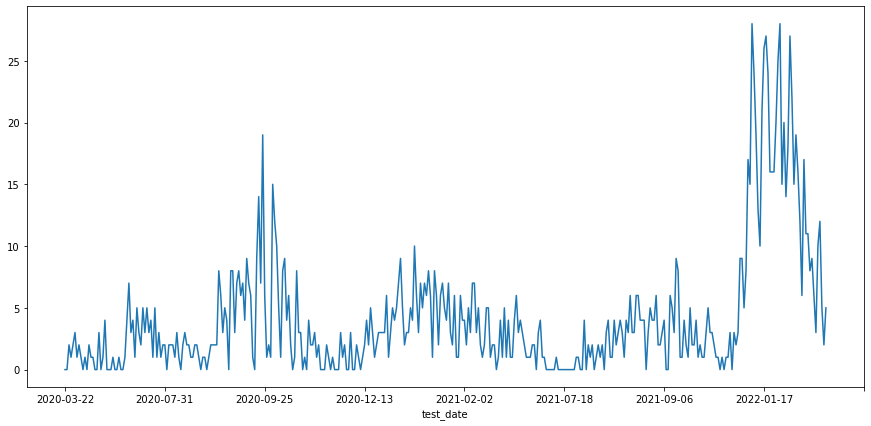

In [218]:
# Plot the number of cases in time series sample data
df_daily=sample_df.groupby(sample_df.index)['corona_result'].sum()
df_daily.loc["2019":"2023"].plot(figsize = (15, 7), subplots=False, layout=(1, 2) , sharey=True);

In [219]:
df_sum=sample_df.groupby(sample_df.index)['corona_result','fever','cough','sore_throat','shortness_of_breath', 'head_ache','at1_symptoms','all_symptoms'].sum()
df_sum.sample(7)

,corona_result,fever,cough,sore_throat,shortness_of_breath,head_ache,at1_symptoms,all_symptoms
test_date,,,,,,,,
2021-07-31,1,0,0,0,0,0,0,0
2021-03-16,1,0,0,0,0,0,0,0
2020-10-15,0,1,1,2,0,1,3,0
2020-07-08,7,7,6,1,1,4,12,1
2020-08-10,3,2,0,1,0,1,3,0
2021-10-06,1,1,1,1,1,1,1,1
2022-01-10,15,0,2,0,0,0,2,0


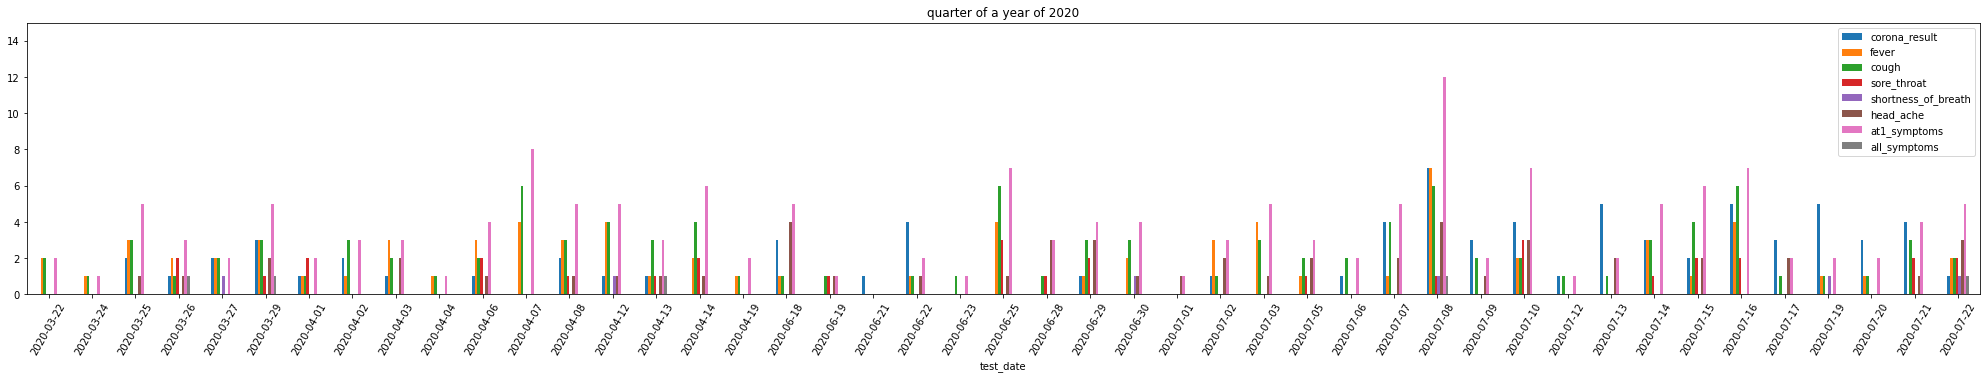

In [220]:
#plot a quarter of a year of 2020
df_sum.loc["2020-03-22":"2020-07-22"].plot(figsize=(35,5),use_index=True , rot=60  , fontsize=10 ,kind = 'bar' ,ylim=(0,15),
        title = "quarter of a year of 2020");

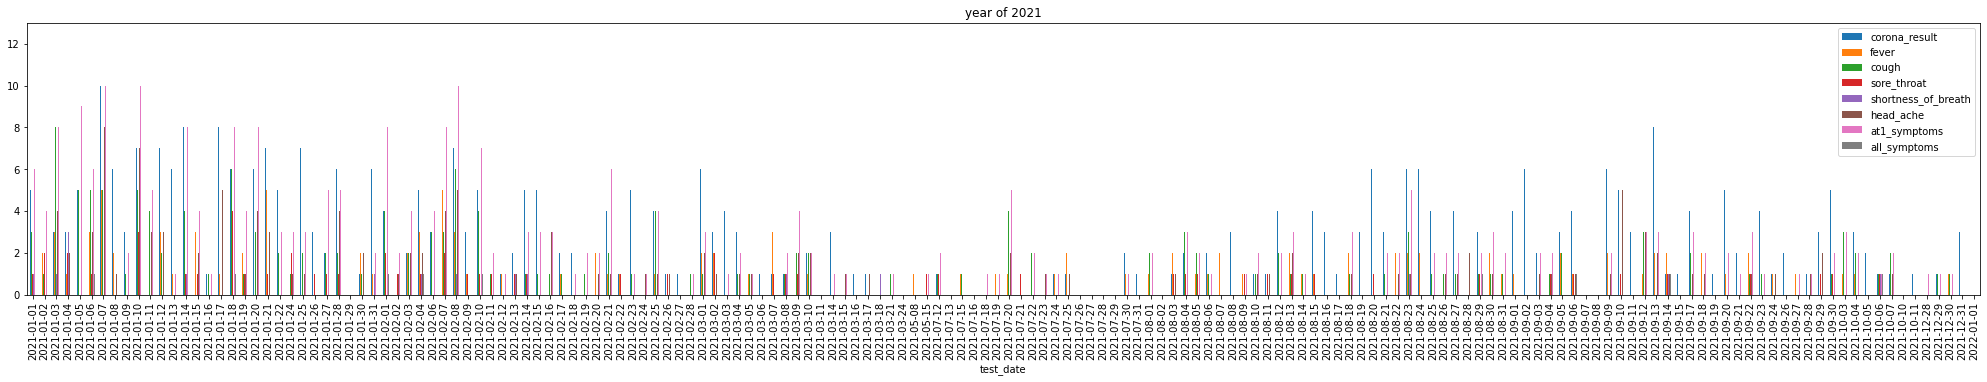

In [221]:
# Plot the year of 2021
df_sum.loc["2021-01-01":"2022-01-01"].plot(figsize=(35,5),use_index=True , rot=90  , fontsize=10 ,kind = 'bar' ,ylim=(0,13),
        title = "year of 2021");

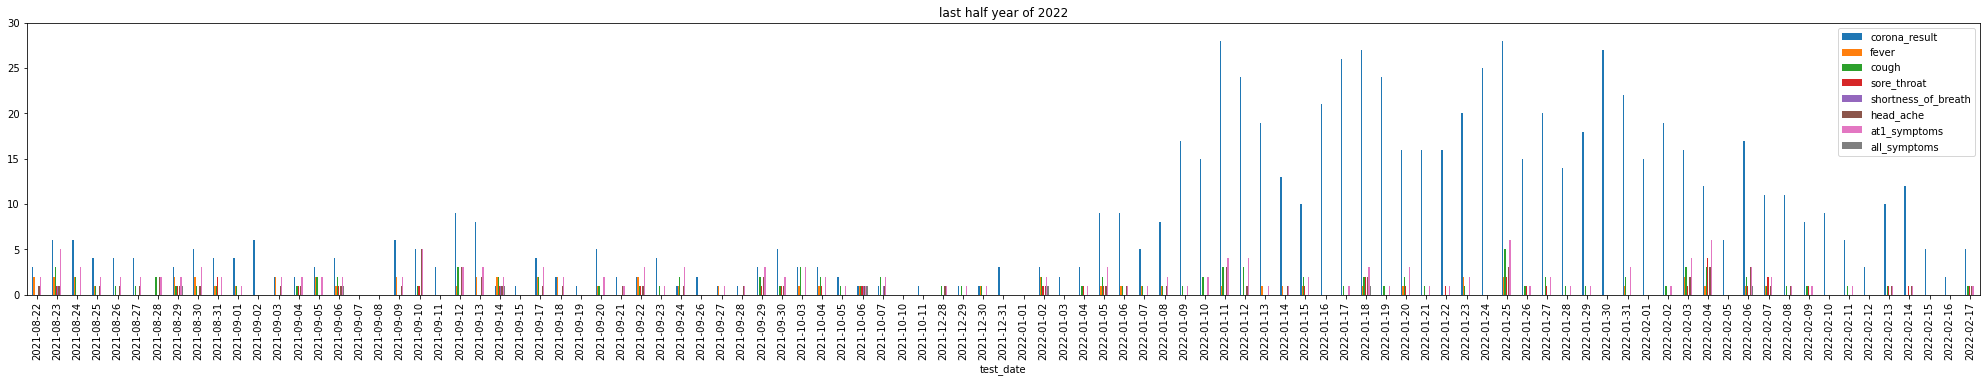

In [222]:
# Plot the last half year of 2022
df_sum.loc["2021-08-22":"2022-02-17"].plot(figsize=(35,5),use_index=True , rot=90  , fontsize=10 ,kind = 'bar' ,ylim=(0,30),
        title = "last half year of 2022");

In [234]:
import plotly.express as px
fig = px.box(df_sum,y=df_sum.index, x="corona_result", points="all", title = "cases of corona fer month")
fig.show()

In [229]:
# train test split
X = df_sum.drop(columns=['corona_result'])
Y = df_sum['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 7)

In [145]:
# Dummy model as model zero usin strategy='most_frequent'
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.5003496340496947

### Part #3 :Ensemble Classifiers & Boosting Classifires

- Using Ensemble Classifiers that might be better than the easy learners models

#### Model#0 :Naive Byes 

In [88]:
# Using naive bayes model 
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_predict_naive_bayes = naive_bayes.fit(X_train,y_train).predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test , y_predict_naive_bayes)

In [89]:
print("The accuracy of Zero Model - Naive bayes is {:0.4f}%".format(naive_bayes_accuracy*100))

The accuracy of Zero Model - Naive bayes is 61.0813%


#### Model#1 :AdaBoost 

In [149]:
# Using AdaBoost Voting model
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(base_estimator=random_forest)
ada_boost.fit(X_train, y_train)
y_predict_ada_boost = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test,y_predict_ada_boost)

In [82]:
print("The accuracy of AdaBoost model is {:0.4f}%".format(ada_accuracy*100))

The accuracy of AdaBoost model is 61.1279%


In [83]:
# Search for parameters to tune
ada_boost.get_params().keys()

dict_keys(['algorithm', 'base_estimator__bootstrap', 'base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__max_samples', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__n_estimators', 'base_estimator__n_jobs', 'base_estimator__oob_score', 'base_estimator__random_state', 'base_estimator__verbose', 'base_estimator__warm_start', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [695]:
learning_rate=[0.001 , 0.1 ,0.5, 1 ,10]
algorithm = ['SAMME', 'SAMME.R']
random_state = [None ,42,100,32,10]


param_grid = { 'learning_rate' : learning_rate,
               'algorithm'     : algorithm,
               'random_state'  : random_state}

In [701]:
# Using RandomizedSearchCV with Kfold CV
kf = KFold(n_splits=5, random_state=42, shuffle=True)
ada_boost_grid = GridSearchCV(estimator = ada_boost, param_grid = param_grid, cv = kf, verbose=2, n_jobs = -1)
ada_boost_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.1, 0.5, 1, 10],
                         'random_state': [None, 42, 100, 32, 10]},
             verbose=2)

In [702]:
# print the best score of model that pick from grid search
print("The accuracy of AdaBoost with grid search and Kfold is {:0.4f}%".format(ada_boost_grid.best_score_*100))

The accuracy of AdaBoost with grid search and Kfold is 61.3390%


#### Model#2 : Hard and Soft Voting 

In [703]:
model_1 = knn
model_2 = random_forest
model_3 = logreg
model_4 = ada_boost

In [704]:
voting_clf = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logreg', model_3),('ada_boost',model_4)])
voting_clf.fit(X_train,y_train)
y_predict_voting_clf = voting_clf.predict(X_test)
voting_clf_accuracy = accuracy_score(y_test,y_predict_voting_clf)

In [705]:
print("The accuracy of the Voting model is {:0.4f}%".format(voting_clf_accuracy *100))

The accuracy of the Voting model is 61.9669%


In [707]:
# Define the options of the main parameters
voting =['hard','soft']
weights = [(3,1,3,1),(1,3,2,5),(1,1,2,1),(1,2,1,4),(1,2,1,3)]

param_grid = { 'voting'             : voting,
               'weights'            : weights}

In [708]:
# Using GridSearchCV with Kfold CV
voting_model = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)])
kf = KFold(n_splits=5, random_state=42, shuffle=True)
voting_model_grid = GridSearchCV(estimator = voting_model, param_grid = param_grid, cv = kf, verbose=2, n_jobs = 4)
voting_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='brute',
                                                                          n_neighbors=9,
                                                                          weights='distance')),
                                                    ('random_forest',
                                                     RandomForestClassifier()),
                                                    ('logistic_regression',
                                                     LogisticRegression()),
                                                    ('ada_boost',
                                                     AdaBoostClassifier(base_estimator=RandomForestClassifier()))]),
             n_jobs=4,
             param_grid={'voting': ['hard', 'soft'],
                         'weights':

In [709]:
print("The accuracy of Voting with grid search and Kfold is {:0.4f}%".format(voting_model_grid.best_score_*100))

The accuracy of Voting with grid search and Kfold is 61.3390%


#### Model#3 : Bagging and Pasting with AdaBoost (RandomForest)

In [115]:
bagging = BaggingClassifier(RandomForestClassifier(),bootstrap=True, n_jobs=-1)
bagging.fit(X_train, y_train)
y_predict_bagging = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test,y_predict_bagging)

In [116]:
print("The accuracy of Bagging Classifier model is {:0.4f}%".format(bagging_accuracy*100))

The accuracy of Bagging Classifier model is 61.0114%


In [99]:
pasting = BaggingClassifier(RandomForestClassifier(),bootstrap=False, n_jobs=-1)
pasting.fit(X_train, y_train)
y_predict_pasting = pasting.predict(X_test)
pasting_accuracy = accuracy_score(y_test,y_predict_pasting)

In [100]:
print("The accuracy of Pasting Classifier model is {:0.4f}%".format(pasting_accuracy*100))

The accuracy of Pasting Classifier model is 61.0114%


#### Model #4 : XGBoostClassifier


In [71]:
xgb =  XGBClassifier()
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict_xgb)

In [50]:
print("The accuracy of XGBoostClassifier model is {:0.4f}%".format(xgb_accuracy*100))

The accuracy of XGBoostClassifier model is 65.5065%


#### Model #5 : Gradient Boosting


In [104]:
gradient=GradientBoostingClassifier()
gradient.fit(X_train, y_train)
y_predict_gradient = gradient.predict(X_test)
gradient_accuracy=accuracy_score(y_test,y_predict_gradient)

In [105]:
print("The accuracy of Gradient Boosting model is {:0.4f}%".format(gradient_accuracy*100))

The accuracy of Gradient Boosting model is 61.0813%


### Part #4 : Conclusions and insights

- New conclusions and insights

In [76]:
# Creating DataFrame of the different model performance
model = ['Dummy Classifier','NaiveBayes','KNN - K-Nearest Neighbors' , 'Random Forest' , 'Logistic Regression' ,
         'AdaBoost' , 'Soft Voting' ,'Bagging','Pasting','Gradient Boosting' ,'XGBoostClassifier']
accuracy = [dummy_accuracy,naive_bayes_accuracy , knn_accuracy  , random_forest_accuracy , logreg ,
            ada_accuracy , voting_model_grid ,bagging_accuracy,pasting_accuracy,
            gradient_accuracy,xgb_accuracy]

performance ={'accuracy' : accuracy}
performance_data = pd.DataFrame(data = performance ,index=model)

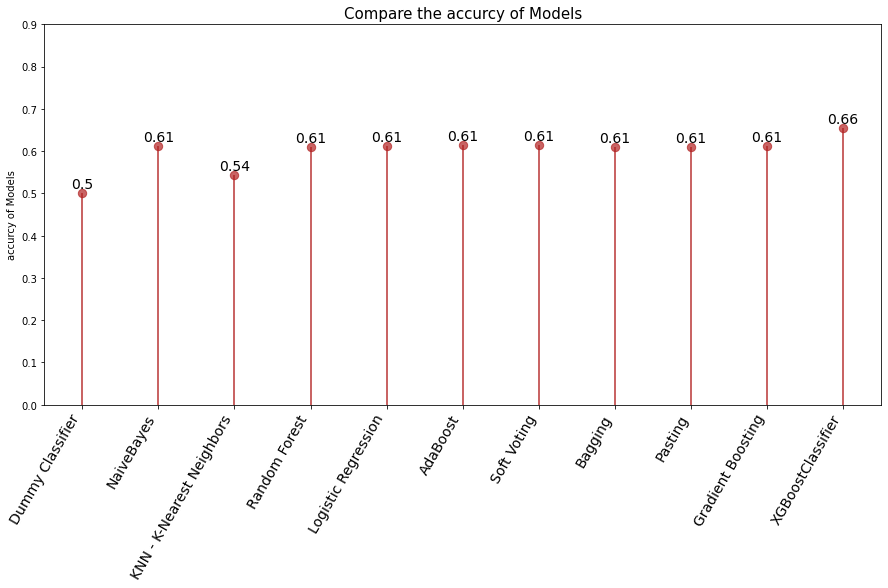

In [77]:
# Draw plot of Compare the accurcy of Models
fig, ax = plt.subplots(figsize=(15,7))
ax.vlines(x=performance_data.index, ymin=0, ymax=performance_data.accuracy, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=performance_data.index, y=performance_data.accuracy, s=70, color='firebrick', alpha=0.7)
ax.set_title('Compare the accurcy of Models', fontdict={'size':15})
ax.set_ylabel('accurcy of Models')
ax.set_xticks(performance_data.index)
ax.set_xticklabels(performance_data.index, rotation=60, fontdict={'horizontalalignment': 'right', 'size':14})
ax.set_ylim(0,0.9)
for row in performance_data.itertuples():
    ax.text(row.Index, row.accuracy+.005, s=round(row.accuracy, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

In [78]:
performance_data.loc[(performance_data.index),('accuracy')]

Dummy Classifier             0.500350
NaiveBayes                   0.610813
KNN - K-Nearest Neighbors    0.544162
Random Forest                0.610114
Logistic Regression          0.610813
AdaBoost                     0.613390
Soft Voting                  0.613390
Bagging                      0.610114
Pasting                      0.610114
Gradient Boosting            0.610813
XGBoostClassifier            0.655065
Name: accuracy, dtype: float64

### For conclusion , 
- we can see **XGBoostClassifier** with using RandomForest combine of 2 ensemble is better than 1 have the best accuracy of **65.5%**!
- We have come to the insight that the data do not reflect a realistic situation as there is no link between the <br>symptoms and the disease.
this can be seen as a result of the reality that a permanent pattern of the virus cannot be identified <br>